In [2]:
!pip install minisom matplotlib

In [3]:
from IPython import display

import numpy as np
from minisom import MiniSom
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Download MNIST dataset
X_mnist, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# Normalize data
X_mnist = X_mnist / 255.0



In [4]:
X_mnist = X_mnist[y == '1']
X_mnist.shape

(7877, 784)

# miniSOM

In [5]:
def plot_som_centroids(som, som_size):
    # Plot the weights of the Kohonen map
    plt.figure(figsize=(som_size, som_size))
    for i in range(som_size):
        for j in range(som_size):
            weight = som.get_weights()[i, j].reshape(28, 28)  # Reshape weights to 28x28 (MNIST images size)
            plt.subplot(som_size, som_size, i*som_size+j+1)
            plt.imshow(weight, cmap='gray')
            plt.axis('off')
    plt.show()

In [6]:
# Initialize Kohonen map (SOM)
som_size = 20  # 10x10 grid
som = MiniSom(som_size, som_size, X_mnist.shape[1], sigma=1.0, learning_rate=0.5)

# Train SOM

In [7]:
print("Training Kohonen map...")

for epoch in range(10):
    print(f"Epoch {epoch+1}/10, Quantization error:, {som.quantization_error(X_mnist)}", end=" ")

    som.train_random(X_mnist, X_mnist.shape[0])  # Train with 60000 iterations
    print()

print("Training completed.")

Training Kohonen map...
Epoch 1/10, Quantization error:, 7.040890045130768 
Epoch 2/10, Quantization error:, 2.120780179630793 
Epoch 3/10, Quantization error:, 2.0262078127787264 
Epoch 4/10, Quantization error:, 1.9690064197080739 
Epoch 5/10, Quantization error:, 1.9505541277240603 
Epoch 6/10, Quantization error:, 1.9342634399049539 
Epoch 7/10, Quantization error:, 1.9375237895290685 
Epoch 8/10, Quantization error:, 1.9328743609317443 
Epoch 9/10, Quantization error:, 1.933293983484574 
Epoch 10/10, Quantization error:, 1.9362671902922892 
Training completed.


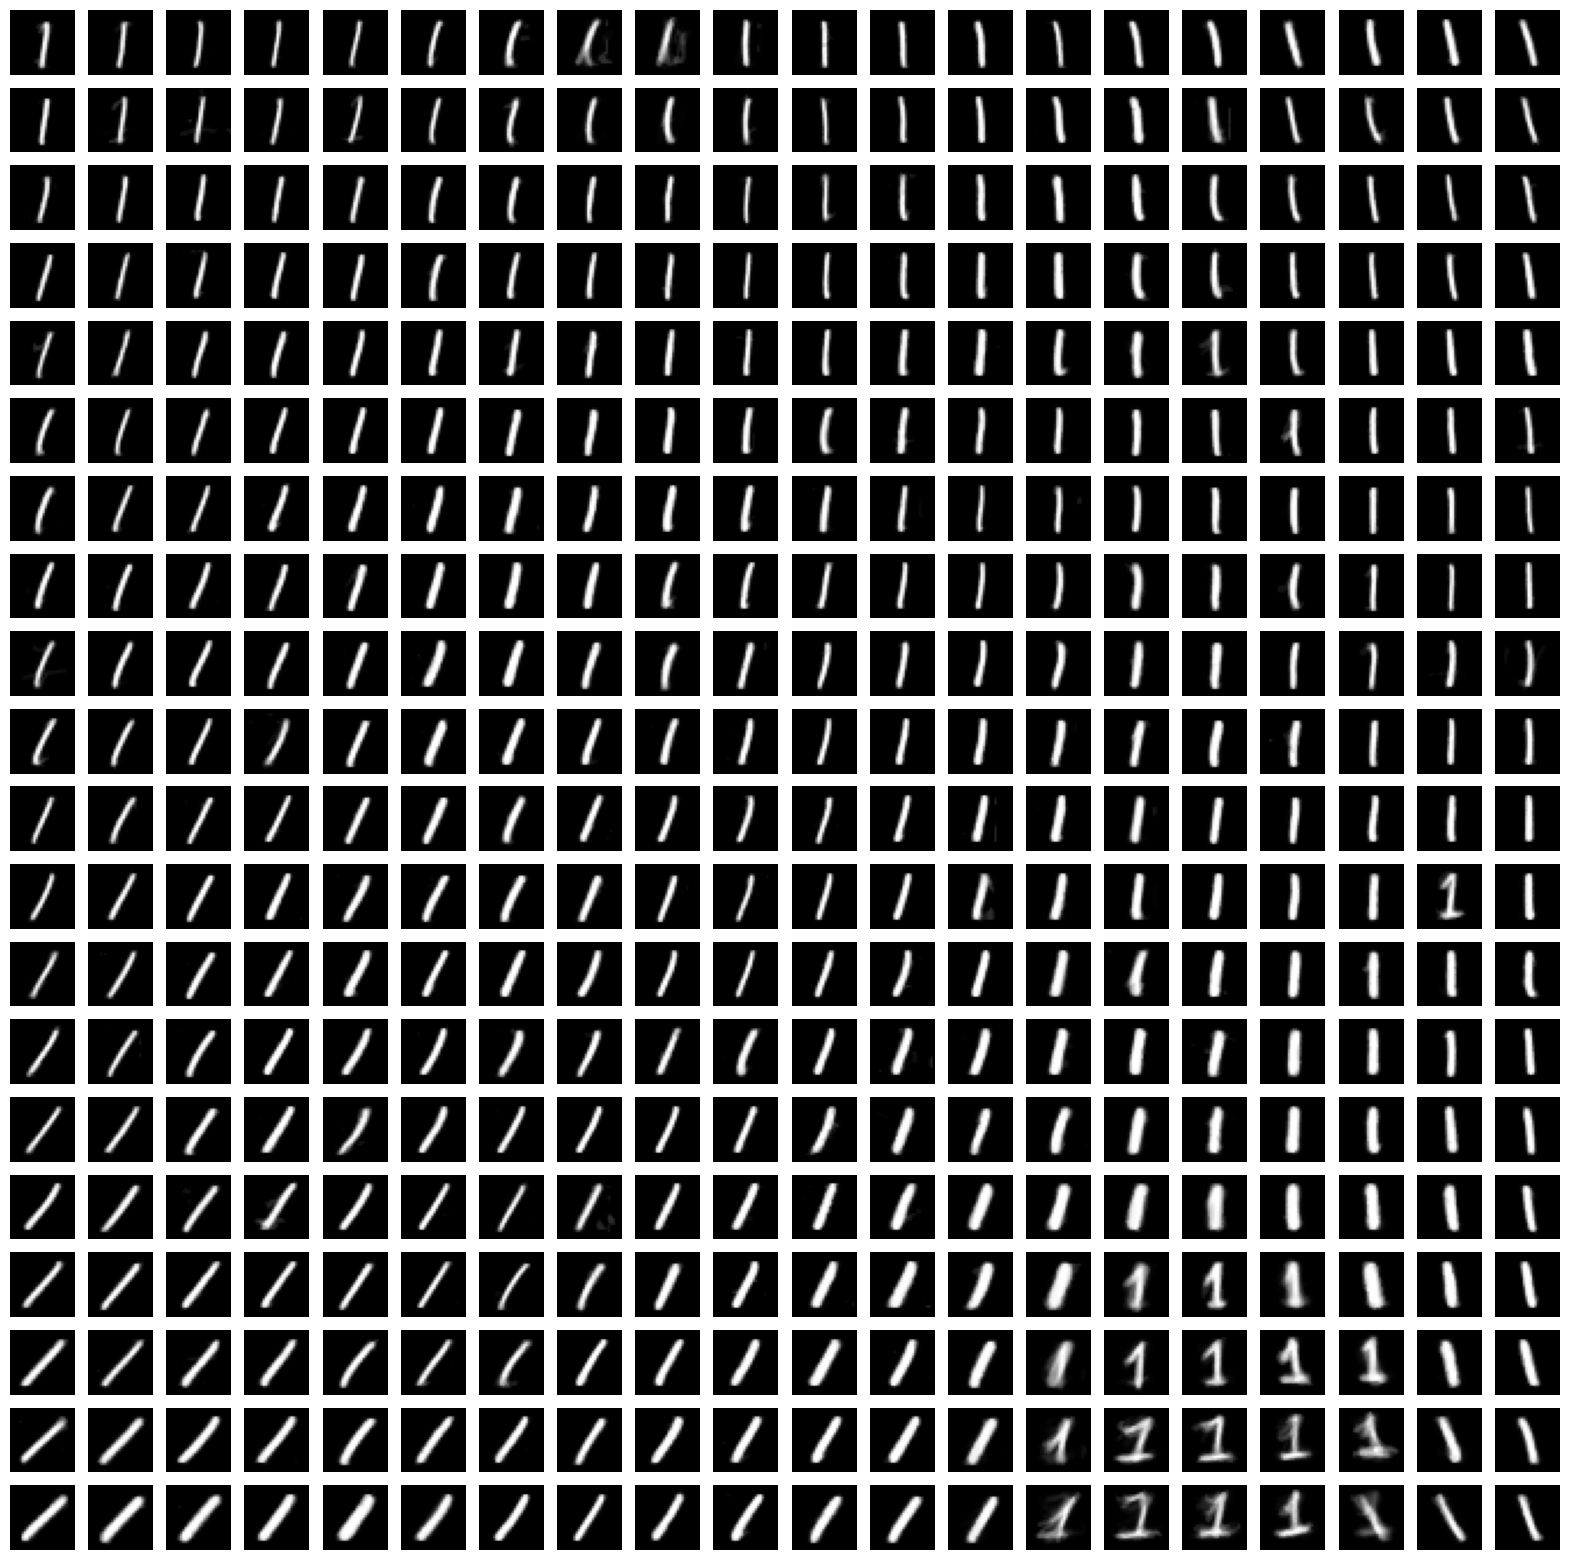

In [8]:
plot_som_centroids(som, som_size)


# learning inverse function

In [13]:
from sklearn.neighbors import NearestNeighbors

def round_centroids(som, som_size, X_mnist):
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(X_mnist)

    round_centroids = np.zeros((som_size, som_size, 28, 28))
    for i in range(som_size):
        for j in range(som_size):
            centroid = som.get_weights()[i, j].reshape(1, -1)
            _, idx = nn.kneighbors(centroid, 1)
            
            round_centroids[i,j] = X_mnist[idx,:].reshape(28,28)
    return round_centroids

rounded_centroids = round_centroids(som, som_size, X_mnist)

Poniżej: $X \in \mathbb{R}^2$, natomiast $Y\in \mathbb{R}^{784}$. $x_i$ to pozycja $i$-tego centroidu w topologii mapy Kohonena, natomiast $y_i$ to nie jest sama surowa pozycja tego centroidu w $\mathbb{R}^{784}$, tylko $y_i$ to jest najbliższy centroidowi prawdziwy obrazek. Dzięki temu model uczy się na obrazkach z ostrzejszym detalem.

In [14]:
X = np.zeros((som_size**2, 2))
Y = np.zeros((som_size**2, 784))

for i in range(som_size):
    for j in range(som_size):
        X[i*som_size+j,:] = np.array([i, j])
        Y[i*som_size+j,:] = rounded_centroids[i,j].reshape(1, -1)

In [ ]:
!pip install xgboost

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

model = make_pipeline(PolynomialFeatures(2), XGBRegressor())
model.fit(X, Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [24]:
X

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  2.],
       [ 0.,  3.],
       [ 0.,  4.],
       [ 0.,  5.],
       [ 0.,  6.],
       [ 0.,  7.],
       [ 0.,  8.],
       [ 0.,  9.],
       [ 0., 10.],
       [ 0., 11.],
       [ 0., 12.],
       [ 0., 13.],
       [ 0., 14.],
       [ 0., 15.],
       [ 0., 16.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 19.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.],
       [ 2.,  0.],
       [ 2.,  1.],
       [ 2.,  2.],
       [ 2.,  3.],
       [ 2.,  4.],
       [ 2.,  5.],
       [ 2.,  6.],
       [ 2.,  7.],
       [ 2.,  8.],
       [ 2.,  9.],
       [ 2., 10.],
       [ 2., 11.],
       [ 2.,

In [21]:
def plot_generation(model, rounded_centroids):
    som_size = rounded_centroids.shape[0]
    plt.figure(figsize=(som_size, som_size))
    for i in range(som_size):
        for j in range(som_size):
            x = np.array([[i, j]]) + np.random.uniform(low=-0.5, high=0.5, size=(2))           
            plt.subplot(som_size, som_size, i*som_size+j+1)
            plt.imshow(model.predict(x).reshape(28,28), cmap='gray')
            plt.axis('off')
    plt.show()

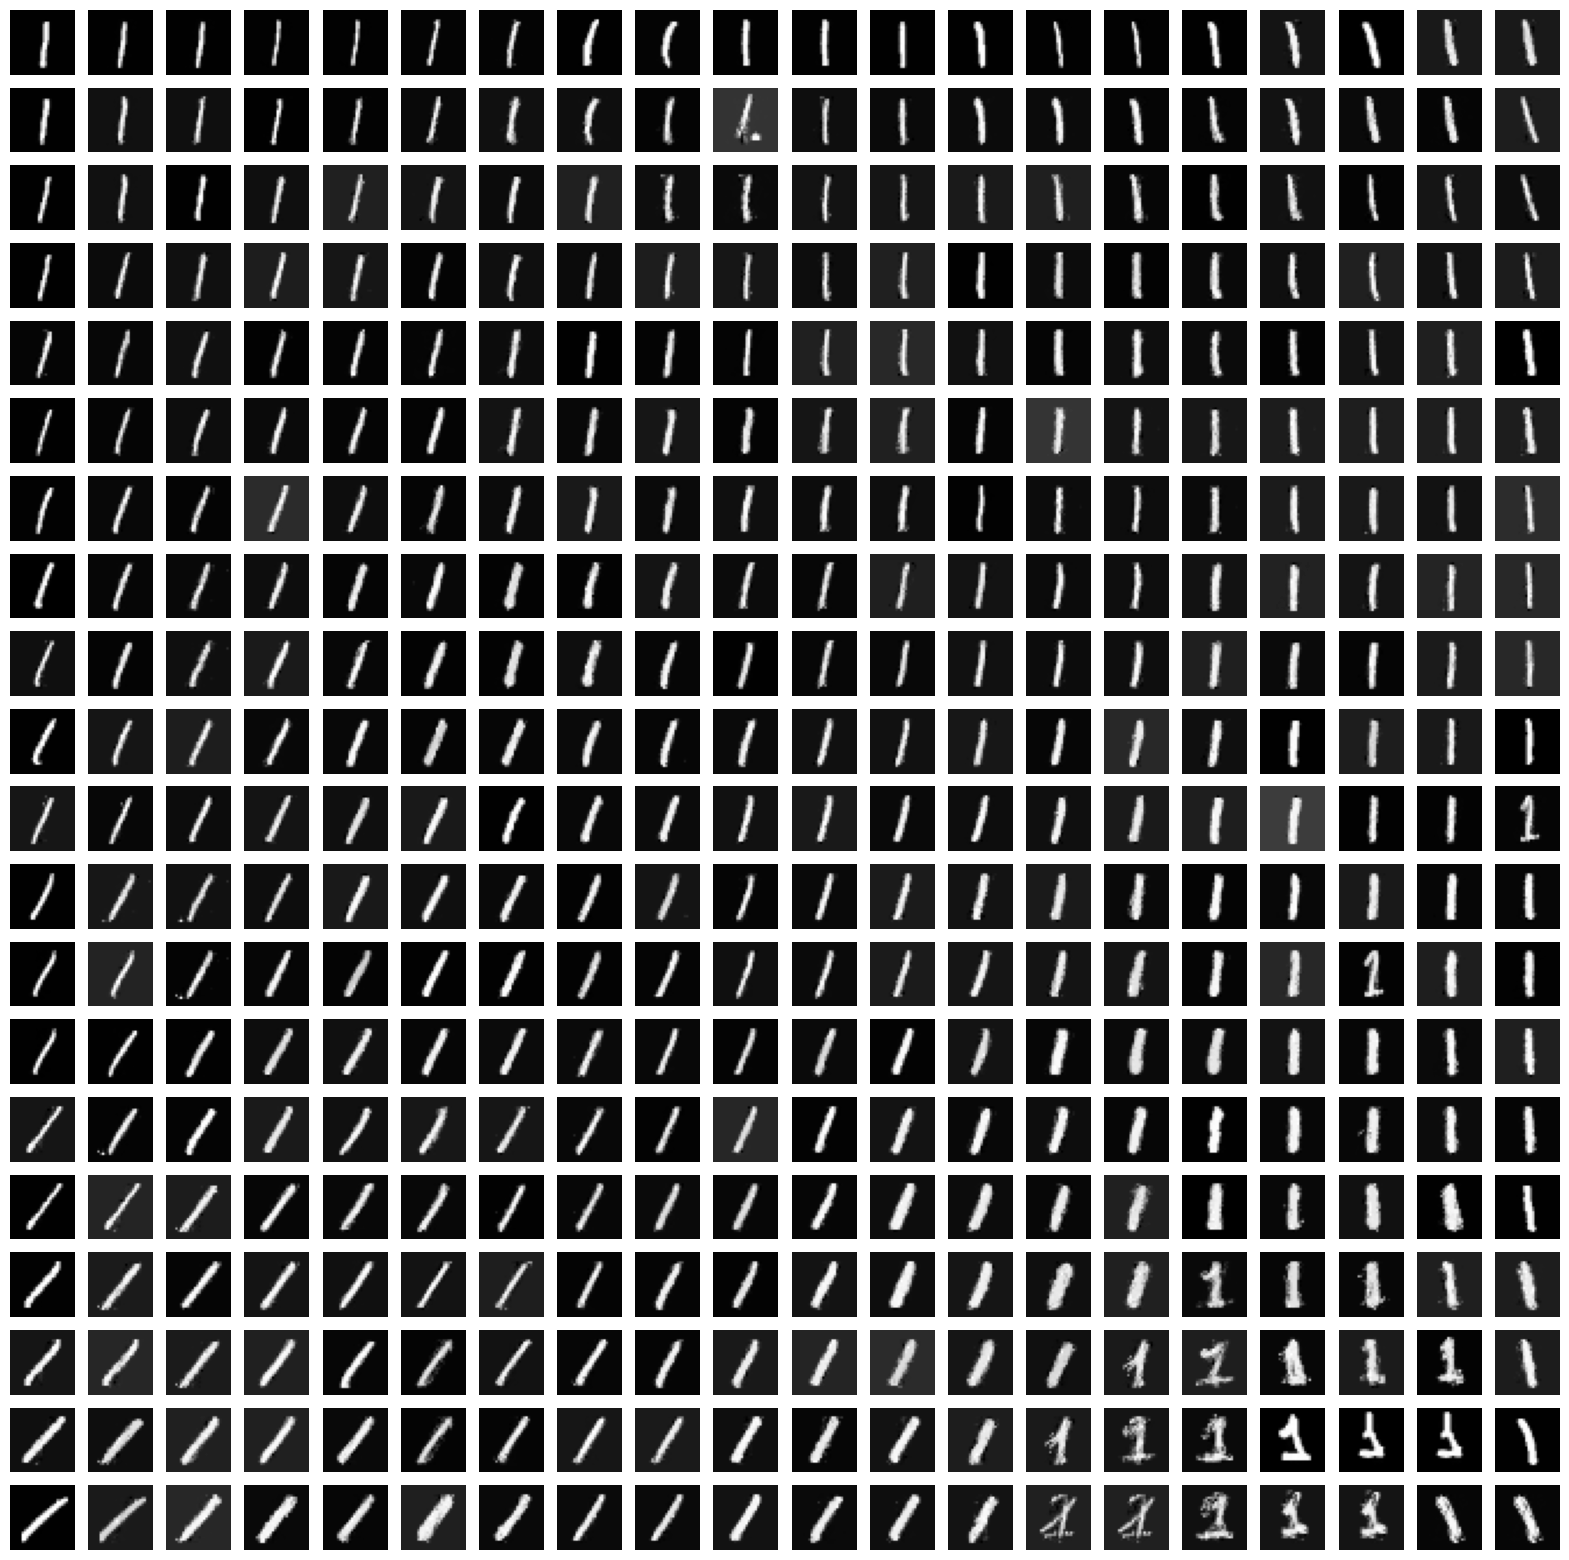

In [22]:
plot_generation(model, rounded_centroids)

# jak ocenić jakość generacji?

Użyjmy kolejnego klasyfikatora do oceny jakości generowania. Stwórzmy dataset złożony z oryginalnych obrazków i złożony z takiej samej ilości obrazków wygenerowanych przez nas. Labele y mówią 1, gdy prawdziwy, a 0, gdy fejk.
Intuicja:
- jeśli obrazki są słabe, to k-NN będzie miał 100% accuracy przy klasyfikacji
- jeśli obrazki są idealnie wierne oryginałom, to accuracy będzie bardzo niskie

Zadanie do pomyślenia:
- **czy w ogóle możliwe jest, aby 1-NN klasyfikator mógł mieć kiedykolwiek 0% accuracy? co dla 2-NN?**

In [23]:
X_tru = Y
X_tru.shape

(400, 784)

In [25]:
data_uniform = np.random.uniform(0, 19, (X_tru.shape[0], 2))
data_uniform

array([[ 7.17419472, 15.14432389],
       [ 7.99055217,  9.95894588],
       [13.87753911, 17.91931906],
       [15.32007783, 14.13415332],
       [16.30847379, 10.98219795],
       [14.43554932, 18.42522592],
       [ 7.78125532,  5.01116294],
       [16.7044932 ,  5.9468968 ],
       [ 5.57628212, 18.70323812],
       [ 7.36784571,  1.60896479],
       [ 6.91517861, 13.59292919],
       [ 9.45870756, 17.83267786],
       [ 2.82021416, 12.41314784],
       [12.37052452, 18.7753237 ],
       [16.35035396, 12.17049964],
       [11.22743106, 14.61943709],
       [16.63190924, 16.45112253],
       [13.10419069, 14.28867144],
       [ 5.45757622,  4.91416926],
       [ 6.8321214 , 17.57785317],
       [ 2.27381116, 16.74029492],
       [ 3.21695984,  9.38633397],
       [ 0.29769844, 16.6177647 ],
       [12.76248685, 11.71738612],
       [ 9.48277235, 15.00544736],
       [17.58380191, 17.30122745],
       [ 8.00174558, 15.25884628],
       [11.7002847 ,  2.80023982],
       [ 5.07677302,

In [30]:
data_uniform.shape

(400, 2)

In [40]:
generated_images = []
for i, random_point in enumerate(data_uniform):
    generated_images.append(model.predict(random_point.reshape(1, -1)).reshape(-1))

X_gen = np.array(generated_images)

In [41]:
X_gen.shape

(400, 784)

In [42]:
X = np.vstack([X_tru, X_gen])
y = np.array(X_tru.shape[0]*[1] + X_gen.shape[0]*[0])

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create kNN classifier. You can adjust the number of neighbors (n_neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 40.00%


In [44]:
def plot_generated_images(generated_images):
    plt.figure(figsize=(som_size, som_size))
    for i in range(som_size):
        for j in range(som_size):           
            plt.subplot(som_size, som_size, i*som_size+j+1)
            plt.imshow(generated_images[i*som_size + j].reshape(28,28), cmap='gray')
            plt.axis('off')
    plt.show()

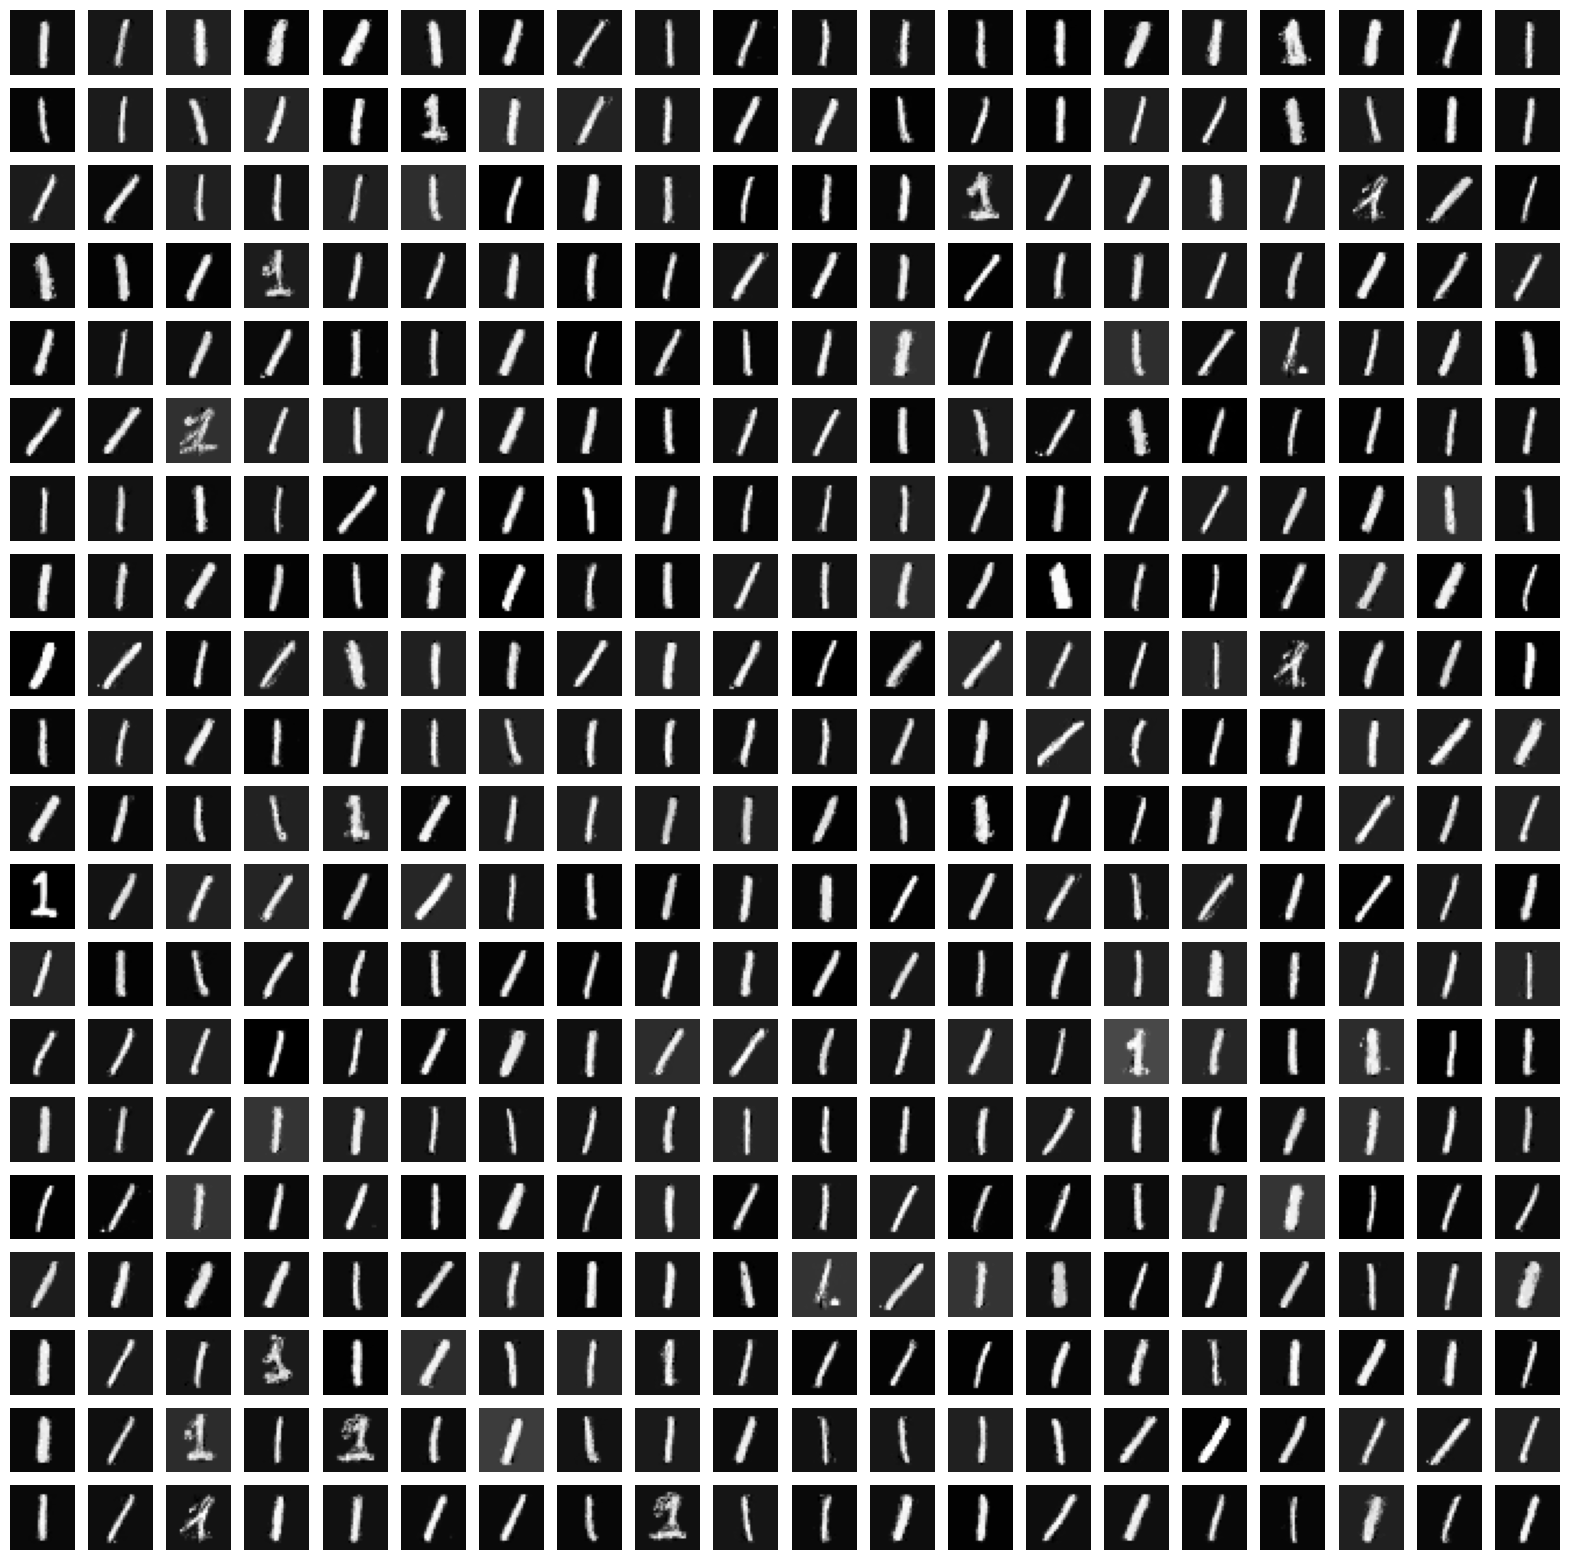

In [45]:
plot_generated_images(generated_images)